In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../../data/incidents.csv', sep=',', low_memory=False)
df['participant_age_group1'].unique()

array(['Adult 18+', nan, 'Teen 12-17', 'Child 0-11'], dtype=object)

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

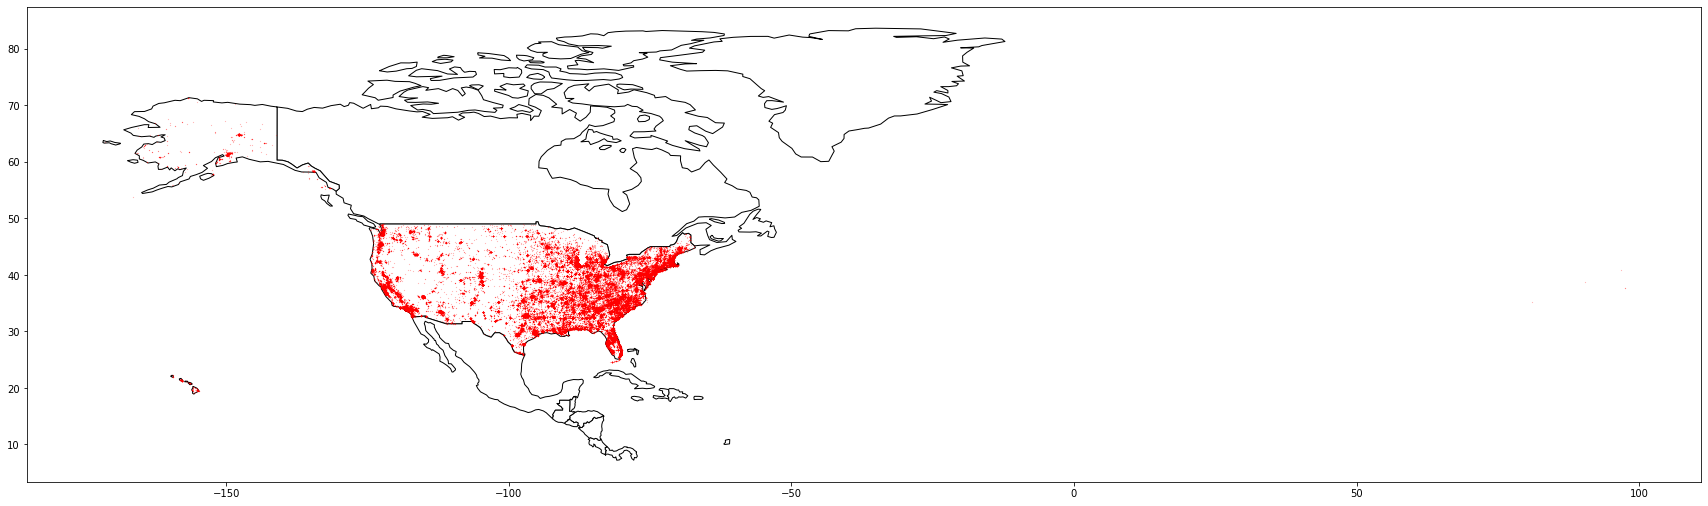

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica la mappa del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtra per ottenere solo il continente nordamericano
usa = world[world.continent == "North America"]

# Supponiamo che 'df' sia il tuo DataFrame e che contenga le colonne 'Lat' e 'Lon'
# Crea un GeoDataFrame dai tuoi dati
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Imposta la dimensione della figura
fig, ax = plt.subplots(figsize=(30, 30))

# Disegna la mappa degli Stati Uniti
usa.plot(ax=ax, color='white', edgecolor='black')

# Disegna i punti del tuo GeoDataFrame sulla mappa
gdf.plot(ax=ax, marker='o', color='red', markersize=0.01)

# Mostra la figura
plt.show()
